In [2]:
import math
%run analyse_microbialMats.py

In [3]:
file_hdr = 'D:/Ronbjerg/FrontView_reflectance-fluorescence/06_860Par/20200718_1945_fluorescence_50pcLED_cube_radiometric.hdr'

In [4]:
#Set variable as image of the cube
img_cube = open_image(file_hdr).open_memmap()
sns.set_style('ticks')

#imshow(img_cube)

In [5]:
# load image cube and rearrange
para, itime, dic_cube, lambda_meas = cube_rearrange(file_hdr)

In [6]:
#Function that finds the nearest array for a given "value".

def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return array[idx]

In [7]:
# W1_list has the three wavelengths that will be analyzed.
wl_list = [682, 786, 895]

# width  slice of the images to be analyzed
px_width_select = [400, 750, 1350, 1750]

# Creates a dictionary 
dic_data = dict()

# converts into a list
wl_inlist = list()

# For every value in W1 List it finds the nearest array
for wl in wl_list:
    l = find_nearest(array=lambda_meas, value=wl)
    wl_inlist.append(l)
    dic_data[l] = dic_cube[l]

In [8]:
wl_inlist

[682.4, 785.997, 895.873]

In [9]:
# 
df = pd.DataFrame(dic_data[785.997][px_width_select[3]])

df.to_clipboard()

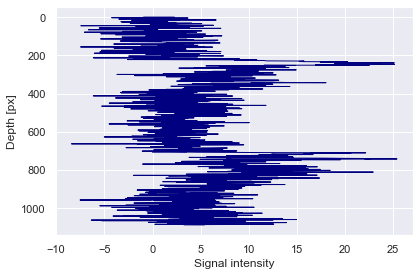

In [10]:
#Sets the plotting style to "darkgrid"

sns.set_style('darkgrid')

# Set the values of the plotting axis to x="values" and y="index".
plt.plot(df.values, df.index, lw=1., color='navy')

#inverts the axis of the plot
plt.gca().invert_yaxis()

#labels the plotting
plt.xlabel('Signal intensity')
plt.ylabel('Depth [px]')
plt.tight_layout()

In [11]:
#pxW_select = np.arange(1350) 
pxW_select = [300, 850, 1000, 1350, 1600]

#Makes the data of the dictionary into a list. The ".keys" Turns the dic_cube into a viewable object. 
ls_wl = list(dic_cube.keys())

#The selection of w1. 
wl_select = [682., 732., 773.]

#w1 
wl_slit = 5. # +/- n

In [12]:
# Ask sylvia
dic_pxW = dict()
for px in pxW_select:
    df1 = pd.concat([dic_cube[wl][px] for wl in ls_wl], axis=1)
    df1.columns = ls_wl
    df2 = pd.concat([df1.loc[:, i-wl_slit:i+wl_slit].mean(axis=1) for i in wl_select], axis=1)
    df2.columns = wl_select
    dic_pxW[px] = df2
    
len(pxW_select)

5

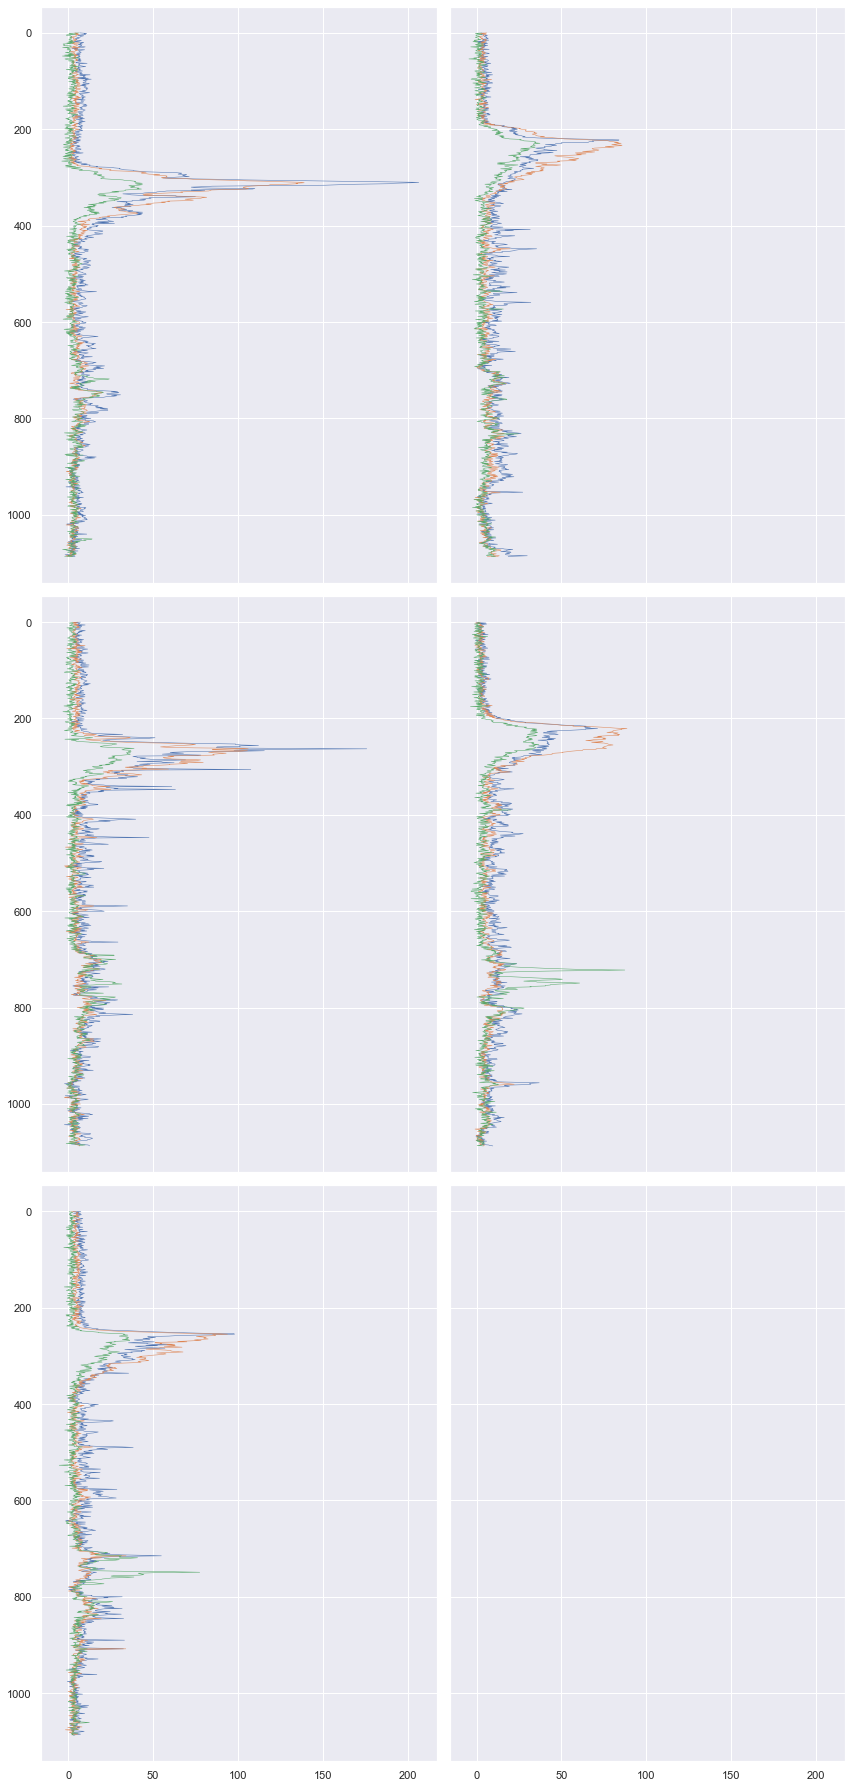

In [13]:
#creates a plot from all the pixelwidth's selected. The x-axis  being signal intensity of the "w1" selection
ncols = 2
nrows = math.ceil(len(pxW_select)/ncols)
fig2, ax2 = plt.subplots(figsize=(12, 25), sharex=True, sharey=True, nrows=nrows, ncols=ncols)

row=0
for en, px in enumerate(pxW_select):
    ax2[en%nrows][row].plot(dic_pxW[px], dic_pxW[px].index, lw=0.5)  
    if en%nrows == nrows-1:
        row += 1 
        
ax2[0][0].invert_yaxis()
plt.tight_layout()
plt.show()

In [14]:
dic_pxW.keys()

dict_keys([300, 850, 1000, 1350, 1600])

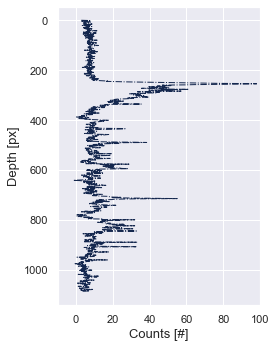

In [15]:
# creates a plot of each wavelength for the pixelwidth selected in "np.arrange"

px = 1000 # must be in the list: dic_pxW.keys()
fs = 13
en = 0
col = ['#14274e', '#f6830f', '#bb2205']
sns.set_style('darkgrid')
fig3, ax3 = plt.subplots(figsize=(4, 5))
ax3.plot(dic_pxW[px][wl_select[en]], dic_pxW[px].index, lw=1., ls='-.', color=col[en])  
        
ax3.invert_yaxis()
ax3.set_xlim(-10, 100)
ax3.set_xlabel('Counts [#]', fontsize=fs)
ax3.set_ylabel('Depth [px]', fontsize=fs)
plt.tight_layout()
plt.show()

In [16]:
# saving figures:
fig3.savefig('Example_onePx_oneWavelength.png', dpi=300, transparent=False)